In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter


In [3]:
# Replace 'your_data.csv' with the actual filename
df = pd.read_csv(r"C:\Users\Dongen_Master\Desktop\L2T2\Dataset .csv")


In [4]:
df.head()



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
# Check the data type of the Cuisines column
print(df['Cuisines'].head())


0          [French, Japanese, Desserts]
1                            [Japanese]
2    [Seafood, Asian, Filipino, Indian]
3                     [Japanese, Sushi]
4                    [Japanese, Korean]
Name: Cuisines, dtype: object


In [10]:
from itertools import combinations
from collections import Counter

# Generate all combinations of cuisines for each restaurant
combinations_list = []

for cuisines in df['Cuisines']:
    if len(cuisines) > 1:
        for combo in combinations(cuisines, 2):  # You can adjust the number for different combination lengths
            combinations_list.append(combo)

# Count the frequency of each combination
combination_counts = Counter(combinations_list)

# Convert to DataFrame for easier visualization
comb_df = pd.DataFrame(combination_counts.items(), columns=['Cuisine Combination', 'Frequency'])
comb_df = comb_df.sort_values(by='Frequency', ascending=False)

# Display the top 10 most common combinations
print(comb_df.head(10))


              Cuisine Combination  Frequency
410       (North Indian, Chinese)       1516
395       (North Indian, Mughlai)        728
462     (North Indian, Fast Food)        377
494          (Chinese, Fast Food)        331
429  (North Indian, South Indian)        314
448   (North Indian, Continental)        288
428       (Chinese, North Indian)        268
442            (Bakery, Desserts)        263
538            (Mughlai, Chinese)        258
430       (South Indian, Chinese)        239


In [11]:
# Create a new column with sorted cuisine combinations to avoid duplicates
df['Cuisine Combination'] = df['Cuisines'].apply(lambda x: tuple(sorted(x)) if len(x) > 1 else tuple(x))

# Group by the cuisine combination and calculate the average rating
avg_rating_df = df.groupby('Cuisine Combination')['Aggregate rating'].mean().reset_index()
avg_rating_df = avg_rating_df.merge(comb_df, on='Cuisine Combination')
avg_rating_df = avg_rating_df.sort_values(by='Aggregate rating', ascending=False)

# Display the top 10 cuisine combinations by average rating
print(avg_rating_df.head(10))


            Cuisine Combination  Aggregate rating  Frequency
193          (European, German)              4.90          2
8    (American, Coffee and Tea)              4.90          1
165    (Contemporary, European)              4.90          1
227         (Hawaiian, Seafood)              4.90          4
171       (Continental, Indian)              4.85          4
214         (Filipino, Mexican)              4.85          2
166     (Contemporary, Italian)              4.80          2
75   (Beverages, International)              4.80          3
137          (Chinese, Dim Sum)              4.75          3
175      (Continental, Mexican)              4.60         37


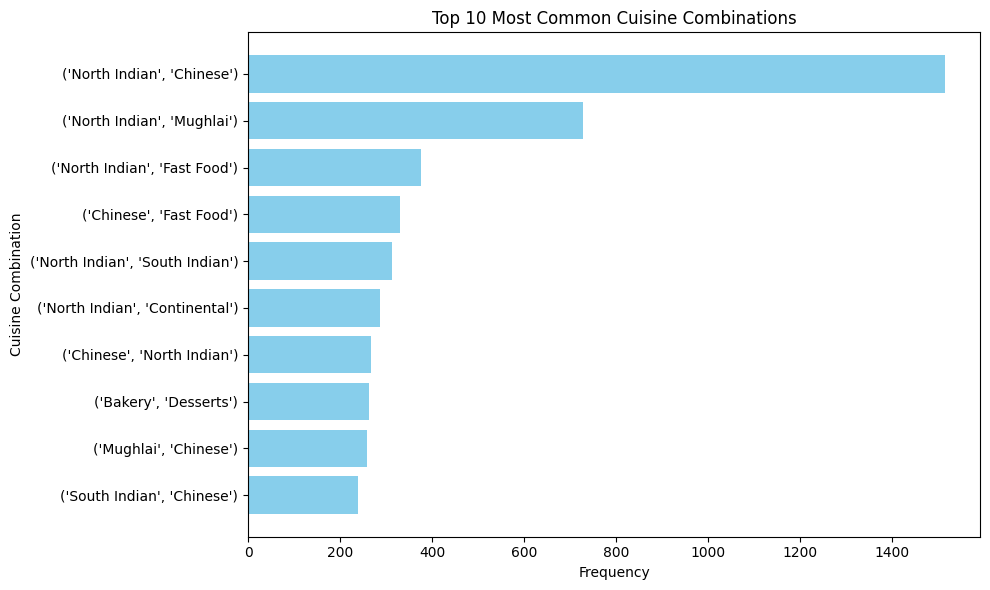

In [12]:
# Get the top 10 most common cuisine combinations
top_combinations = comb_df.head(10)

# Plot the top 10 most common cuisine combinations
plt.figure(figsize=(10, 6))
plt.barh(top_combinations['Cuisine Combination'].astype(str), top_combinations['Frequency'], color='skyblue')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Frequency')
plt.ylabel('Cuisine Combination')
plt.gca().invert_yaxis()  # To display the highest frequency at the top
plt.tight_layout()
plt.savefig('top_cuisine_combinations.png')
plt.show()


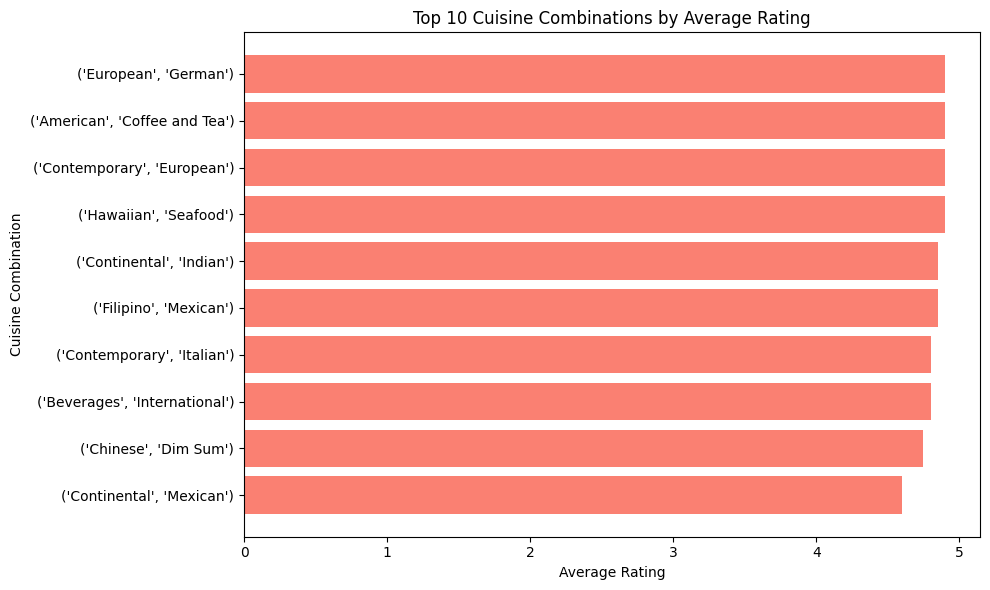

In [13]:
# Get the top 10 cuisine combinations by average rating
top_rated_combinations = avg_rating_df.head(10)

# Plot the top 10 cuisine combinations by average rating
plt.figure(figsize=(10, 6))
plt.barh(top_rated_combinations['Cuisine Combination'].astype(str), top_rated_combinations['Aggregate rating'], color='salmon')
plt.title('Top 10 Cuisine Combinations by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Combination')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()
plt.savefig('top_cuisine_combinations_by_rating.png')
plt.show()
